**Excersive 2.4**
Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_{*}(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the $q_{*}(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using samples averages, incrementally computed, and another action-value method using a constant step-size parameter, $\alpha = 0.1$. Use $\epsilon = 0.1$ and longer runs, say of 10,000 steps.

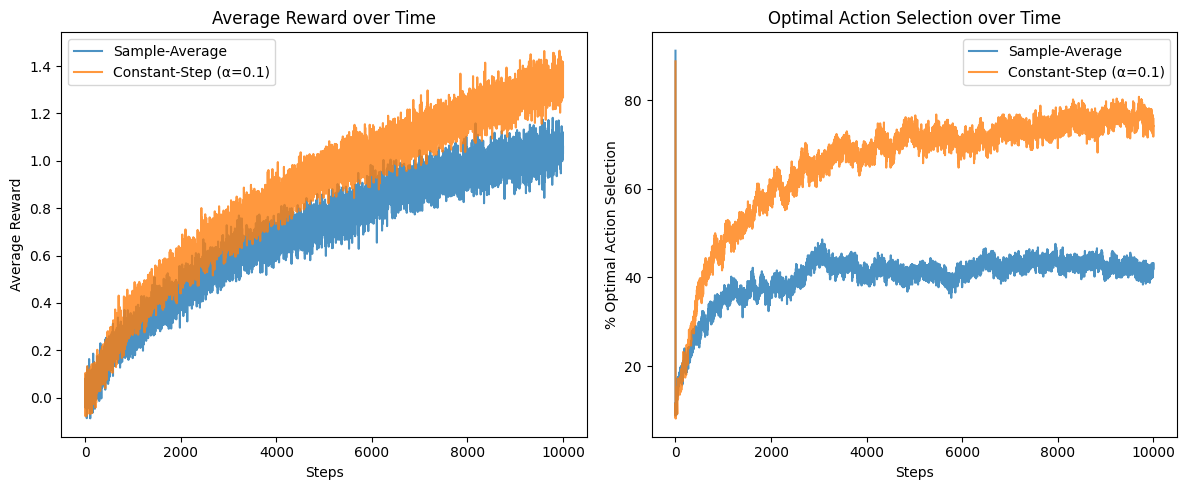

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
num_actions = 10  # 10-armed bandit
num_steps = 10000  # Total time steps
num_runs = 500  # Number of independent runs
epsilon = 0.1  # Exploration rate
alpha = 0.1  # Constant step-size for incremental method
sigma_q = 0.01  # Standard deviation for random walk

def run_bandit_optimized(method):
    avg_rewards = np.zeros(num_steps)
    optimal_action_counts = np.zeros(num_steps)

    for run in range(num_runs):
        q_true = np.zeros(num_actions)
        q_est = np.zeros(num_actions)
        action_counts = np.ones(num_actions)  # Initialize counts to 1 to avoid division by zero

        optimal_action = np.argmax(q_true)

        for t in range(num_steps):
            # Choose action (epsilon-greedy)
            if np.random.rand() < epsilon:
                action = np.random.choice(num_actions)
            else:
                action = np.argmax(q_est)

            # Generate reward
            reward = np.random.normal(q_true[action], 1.0)

            # Update estimates
            if method == "sample-average":
                action_counts[action] += 1
                q_est[action] += (reward - q_est[action]) / action_counts[action]
            elif method == "constant-step":
                q_est[action] += alpha * (reward - q_est[action])

            # Record results
            avg_rewards[t] += reward
            if action == optimal_action:
                optimal_action_counts[t] += 1

            # Update true values (random walk)
            q_true += np.random.normal(0, sigma_q, num_actions)
            optimal_action = np.argmax(q_true)

    avg_rewards /= num_runs
    optimal_action_counts = (optimal_action_counts / num_runs) * 100

    return avg_rewards, optimal_action_counts

# Run optimized experiments
rewards_sample_avg, optimal_sample_avg = run_bandit_optimized("sample-average")
rewards_const_step, optimal_const_step = run_bandit_optimized("constant-step")

# Plot results
plt.figure(figsize=(12, 5))

# Average rewards plot
plt.subplot(1, 2, 1)
plt.plot(rewards_sample_avg, label="Sample-Average", alpha=0.8)
plt.plot(rewards_const_step, label="Constant-Step (α=0.1)", alpha=0.8)
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Average Reward over Time")
plt.legend()

# Optimal action percentage plot
plt.subplot(1, 2, 2)
plt.plot(optimal_sample_avg, label="Sample-Average", alpha=0.8)
plt.plot(optimal_const_step, label="Constant-Step (α=0.1)", alpha=0.8)
plt.xlabel("Steps")
plt.ylabel("% Optimal Action Selection")
plt.title("Optimal Action Selection over Time")
plt.legend()

plt.tight_layout()
plt.show()